In [1]:
import numpy as np
import pandas as pd

from sklearn import preprocessing
from sklearn import cross_validation
from sklearn import metrics
from sklearn import feature_selection
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
%matplotlib inline

/home/bruno/.virtualenvs/iPTF/local/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
import ml_experiment as ml

In [40]:
data = pd.read_csv('./ATLAS_LC/signatures_16_encoded.csv', index_col=0)

In [41]:
objid = data['OBJID']
filt = data['filter']
y = data['CLASS']
x = data[['encode_{}'.format(i+1) for i in range(16)]]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], <a list of 11 Text xticklabel objects>)

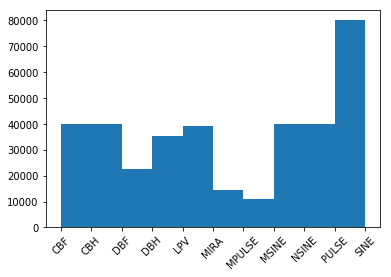

In [44]:
plt.figure(figsize=(6, 4))
plt.hist(y)
plt.xticks(rotation=45)

In [68]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.98, random_state=17)

In [65]:
len(X_train)

7250

In [71]:
y_train[y_train=='CBH'] = 0
y_train[y_train=='CBF'] = 1
y_train[y_train=='DBH'] = 2
y_train[y_train=='DBF'] = 3
y_train[y_train=='LPV'] = 4
y_train[y_train=='IRR'] = 5
y_train[y_train=='SINE'] = 6
y_train[y_train=='NSINE'] = 7
y_train[y_train=='MSINE'] = 8
y_train[y_train=='MIRA'] = 9
y_train[y_train=='PULSE'] = 10
y_train[y_train=='MPULSE'] = 11

In [72]:
result = ml.experiment(clf=RandomForestClassifier(max_features=6, n_estimators=600, n_jobs=4), 
              x=X_train.values, y=y_train.values.astype(int), nfolds=4, printing=True)

             precision    recall  f1-score   support

        0.0       0.41      0.42      0.41       786
        1.0       0.42      0.39      0.40       785
        2.0       0.56      0.68      0.62       717
        3.0       0.36      0.16      0.22       451
        4.0       0.49      0.51      0.50       766
        6.0       0.29      0.30      0.29       804
        7.0       0.35      0.48      0.41       825
        8.0       0.28      0.24      0.26       803
        9.0       0.59      0.53      0.56       296
       10.0       0.66      0.74      0.70       777
       11.0       0.32      0.04      0.07       240

avg / total       0.43      0.44      0.42      7250



ValueError: multiclass format is not supported